# Principal Component Analysis

### Problem Definition

Given $N$ vectors, $X = \{\mathbf{x}_1 \cdots \mathbf{x}_N\} $, $\mathbf{x}_n \in \mathbb{R}^D$, find lower dimensional representation of each $\mathbf{x}_n$, $\tilde{\mathbf{x}}_n$ such that reconstruction error of $\mathbf{x}_n$ from $\tilde{\mathbf{x}}_n$ is minimized.
\par Each vector, $\mathbf{x}_n$ in $\mathbb{R}^D$ can be represented as,
$$\mathbf{x}_n = \sum_{i=1}^{D} \beta_{in}\mathbf{b}_i$$ 
where $\mathbf{b}_i$ is the $i$-th **orthonormal basis** of $\mathbb{R}^D$ and $\beta_{in}$ is the projection of $\mathbf{x}_n$ onto subspace spanned by $\mathbf{b}_i$.

Representation of $\mathbf{x}_n$ in an $M$-dimensional subspace of $\mathbb{R}^D, \tilde{\mathbf{x}}_n$,  can be obtained as, 
\begin{align}
\label{xn}
\mathbf{x}_n &= \sum_{i=1}^{M} \beta_{in}\mathbf{b}_i + \sum_{i=M+1}^{D} \beta_{jn}\mathbf{b}_j \\
\tilde{\mathbf{x}}_n &= \sum_{i=1}^{M} \beta_{in}\mathbf{b}_i
\end{align}

Here, the vector space spanned by $\mathbf{b}_1 \cdots \mathbf{b}_M$ is called principal subspace, if the first $M$ basis vectors are selected appropriately and the vector space spanned by $\mathbf{b}_{M+1} \cdots \mathbf{b}_D$ is called orthogonal complement of principal subspace.

Thus, $\tilde{\mathbf{x}}_n$ is a $D$-dimensional vector lying in $M$-dimensional subspace of $\mathbb{R}^D$ and requires only $M$ coordinates, $\beta_{1n} \cdots \beta_{1M}$ with respect to $M$ basis vectors, $\mathbf{b}_1 \cdots \mathbf{b}_M$.

To find $\tilde{\mathbf{x}}_n$, we need to find $\beta_{in}$ and $\mathbf{b}_i$ such that the average squared reconstruction error, $J$ is minimized.
\begin{equation}
J = \frac{1}{N}\sum_{n=1}^{N}{\lVert \textbf{x}_n - \tilde{\textbf{x}}_n \rVert}^2
\end{equation}
$$\frac{\partial J}{\partial (\beta_{in}, \mathbf{b}_i)} = \frac{\partial J}{\partial \tilde{\mathbf{x}}_n} \frac{\partial \tilde{\mathbf{x}}_n}{\partial (\beta_{in}, \mathbf{b}_i)}$$
where,
\begin{align}
\frac{\partial J}{\partial \tilde{\mathbf{x}}_n} &= -\frac{2}{N}(\mathbf{x}_n - \tilde{\mathbf{x}}_n)^T \\
\frac{\partial \tilde{\mathbf{x}}_n}{\partial \beta_{in}} &= \mathbf{b}_i
\end{align}


### Optimal Projection Parameters, $\beta_{in}$

$$\frac{\partial J}{\partial \beta_{in}} = 0$$
\begin{align*}
\frac{\partial J}{\partial \beta_{in}} &= \frac{\partial J}{\partial \tilde{\mathbf{x}}_n} \frac{\partial \tilde{\mathbf{x}}_n}{\partial \beta_{in}} \\
&= -\frac{2}{N}(\mathbf{x}_n - \tilde{\mathbf{x}}_n)^T \mathbf{b}_i \\
&= -\frac{2}{N}\left( \mathbf{x}_n - \sum_{j=1}^{M} \beta_{jn}\mathbf{b}_j \right)^T \mathbf{b}_i \\
&= -\frac{2}{N}\left( \mathbf{x}_n^T\mathbf{b}_i - \beta_{in}\mathbf{b}_i^T \mathbf{b}_i \right) & \textrm{($\because \mathbf{b}_j$s are orthonormal vectors)}\\
\frac{\partial J}{\partial \beta_{in}} &= -\frac{2}{N}\left( \mathbf{x}_n^T\mathbf{b}_i - \beta_{in} \right) &\textrm{($\because \mathbf{b}_i$ is orthonormal vector)}
\end{align*}
$$-\frac{2}{N}\left( \mathbf{x}_n^T\mathbf{b}_i - \beta_{in} \right) = 0 $$
\begin{align*}
\implies \beta_{in} = \mathbf{x}_n^T\mathbf{b}_i = \mathbf{b}_i^T\mathbf{x}_n
\end{align*}

$$\tilde{\mathbf{x}}_n = \sum_{i=1}^{M} \mathbf{b}_i \beta_{in} $$
\begin{equation}
\tilde{\mathbf{x}}_n = \left( \sum_{i=1}^{M} \mathbf{b}_i\mathbf{b}_i^T \right) \mathbf{x}_n
\end{equation}

In matrix form, if $\mathbf{X} = \begin{bmatrix}
\mathbf{x}_1 & \cdots & \mathbf{x}_N
\end{bmatrix}_{D \times N}$ and $\mathbf{B} = \begin{bmatrix}
\mathbf{b}_1 & \cdots & \mathbf{b}_M
\end{bmatrix}_{D \times M}$,
$$\pmb{\beta}_{M \times N} = \mathbf{B}^T\mathbf{X}$$
\begin{align*}
\textrm{Code, } \mathbf{\tilde{X}}_{D \times N} &= \mathbf{B}\pmb{\beta} \\
\mathbf{\tilde{X}} &= \mathbf{B}\mathbf{B}^T\mathbf{X}
\end{align*}

### Objective Reformulation

\begin{align*}
\mathbf{x}_n &= \left( \sum_{i=1}^{M} \mathbf{b}_i\mathbf{b}_i^T \right) \mathbf{x}_n + \left( \sum_{j=M+1}^{D} \mathbf{b}_j\mathbf{b}_j^T \right) \mathbf{x}_n \\
\mathbf{x}_n - \tilde{\mathbf{x}}_n &= \left( \sum_{j=M+1}^{D} \mathbf{b}_j\mathbf{b}_j^T \right) \mathbf{x}_n \\
&= \sum_{j=M+1}^{D} (\mathbf{b}_j^T \mathbf{x}_n) \mathbf{b}_j
\end{align*}

\begin{align*}
J &= \frac{1}{N}\sum_{n=1}^{N}{\left\lVert \sum_{j=M+1}^{D} (\mathbf{b}_j^T \mathbf{x}_n) \mathbf{b}_j \right\rVert}^2  \\
&= \frac{1}{N}\sum_{n=1}^{N} \sum_{j=M+1}^{D} (\mathbf{b}_j^T \mathbf{x}_n)^2 &\textrm{($\because \mathbf{b}_j$ forms orthonormal basis)} \\
&= \frac{1}{N}\sum_{n=1}^{N} \sum_{j=M+1}^{D} \mathbf{b}_j^T \mathbf{x}_n \mathbf{x}_n^T \mathbf{b}_j \\
&= \sum_{j=M+1}^{D} \mathbf{b}_j^T \left( \frac{1}{N}\sum_{n=1}^{N} \mathbf{x}_n \mathbf{x}_n^T \right) \mathbf{b}_j
\end{align*}

\begin{equation}
\label{J_2}
J = \sum_{j=M+1}^{D} \mathbf{b}_j^T \mathbf{S} \mathbf{b}_j = trace \left( \left( \sum_{j=M+1}^{D} \mathbf{b}_j^T \mathbf{b}_j \right) \mathbf{S} \right)
\end{equation}

where $\mathbf{S}$ is the**Data Covariance Matrix** if data is centered ($\mathbf{E}[\mathbf{X}] = \mathbf{0}$) and $\sum_{j=M+1}^{D} \mathbf{b}_j^T \mathbf{b}_j$ is the Projection Matrix which projects $\mathbf{S}$ onto orthogonal complement of principal subspace.

Thus, minimizing $J$ is equivalent to minimizing variance of data lying in orthogonal complement of principal subspace or retaining maximum variance in principal subspace after projection.

### Optimal Basis Vectors, $\mathbf{b}_i$

Consider the two-dimensional case with orthonormal basis vectors $\mathbf{b}_1, \mathbf{b}_2 \in \mathbb{R}^2$ with $\mathbf{b}_1$ spanning principal subspace and $\mathbf{b}_2$ spanning orthogonal complement.

$$J = \mathbf{b}_2^T S \mathbf{b}_2$$
$$\mathbf{b}_2^T \mathbf{b}_2 = 1$$
By method of Lagrange multipliers,
$$\mathcal{L} = \mathbf{b}_2^T S \mathbf{b}_2 + \lambda(1-\mathbf{b}_2^T \mathbf{b}_2)$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial \lambda} &= 1-\mathbf{b}_2^T \mathbf{b}_2 = 0 \\
&\iff \mathbf{b}_2^T \mathbf{b}_2 = 1 \\
\frac{\partial \mathcal{L}}{\partial \mathbf{b}_2} &= 2\mathbf{b}_2^T S - 2\lambda\mathbf{b}_2^T \\
&\iff \mathbf{S}\mathbf{b}_2 = \lambda\mathbf{b}_2
\end{align*}

Thus, $\mathbf{b}_2$ is the eigen vector of $\mathbf{S}$ with eigen value, $\lambda$.

$$J = \mathbf{b}_2^T\lambda\mathbf{b}_2 = \lambda\mathbf{b}_2^T\mathbf{b}_2 = \lambda$$

Generally,
$$\mathbf{S} = \lambda_j \mathbf{b}_j, j=M+1 \cdots D$$
$$J = \sum_{j=M+1}^{D}\lambda_j$$

Since eigen vectors of $\mathbf{S}$ is orthogonal (because of symmetry of $\mathbf{S}$), minimizing $J$ implies finding eigen vectors with minimum eigen values that spans orthogonal complement of principal subspace or finding eigen vectors with maximum eigen values that spans principal subspace.

Thus eigen vector with largest eigen value points in the direction of data with maximum variance, given by the eigen value itself.

### Summary of Steps

1. Center and normalize data w.r.t. each dimension, $d$,  $\mathbf{X}_*^{(d)} = \frac{{\mathbf{X}}^{(d)} - \pmb{\mu}^{(d)}}{\pmb{\sigma}^{(d)}}$.
2. Find data covariance matrix, $\mathbf{S} = \mathbf{X}\mathbf{X}^T$.
3. Find $M$ orthonormal basis vectors, $\mathbf{B}_{D \times M}$ of eigen vectors with highest eigen values of $\mathbf{S}$. 
4. Reconstruced data, $\mathbf{\tilde{X}}_* = \Pi_u(\mathbf{X}) = \mathbf{B}\mathbf{B}^T\mathbf{X}_*$

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
mnist = sio.loadmat('mnist-original.mat')
X = mnist['data']
y = mnist['label']
D, N = X.shape
print("Number of data vectors, N = ", N)
print("Dimension of data vector, D = ", D)

Number of data vectors, N =  70000
Dimension of data vector, D =  784


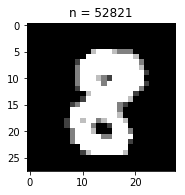

In [3]:
n = np.random.randint(0, N+1)

# Plot original and reconstructed image
plt.figure(figsize=(6,6))
plt.subplot(211)
plt.imshow(X[:, n].reshape(28, 28), cmap='gray')
plt.title('n = ' + str(n))
pass

#### Center and Normalize Data 

In [4]:
# Mean and Standard Deviation along each dimension 
mu = np.mean(X, axis=1).reshape(D, 1)
std = np.std(X, axis=1).reshape(D, 1)

# Replace zero standard deviation by one to avoid division by zero.
std_ = std.copy()
std_[std == 0] = 1.

X_ = (X - mu) / std_

#### Data Covariance Matrix and Eigen Problem

In [5]:
S = X_ @ X_.T 
eigvals, eigvecs = np.linalg.eig(S)

#### Principal Basis Vectors

In [6]:
M = 392
# Find M eigen vectors with highest eigen values
B = eigvecs[:, np.argsort(eigvals)[::-1][:M]]

#### Projection onto Principal Subspace

In [7]:
# Code
Beta = B.T @ X_
print("Dimension of projected data, M = ", Beta.shape[0])

Dimension of projected data, M =  392


#### Reconstruction

In [8]:
X_hat = B @ Beta

M =  392  n =  62404


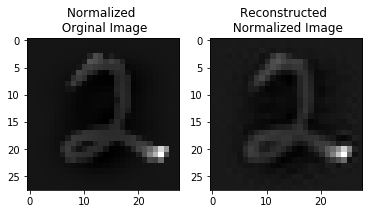

In [9]:
n = np.random.randint(0, N+1)

# Plot original and reconstructed image
plt.figure(figsize=(6,6))
plt.subplot(121)
plt.imshow(X_[:, n].reshape(28, 28), cmap='gray')
plt.title('Normalized \n Orginal Image')

plt.subplot(122)
plt.imshow(X_hat[:, n].reshape(28, 28), cmap='gray')
plt.title('Reconstructed \n Normalized Image')

print("M = ", str(M) ," n = ", str(n))

TODO

  - PCA of High Deimensional Data